In [1]:
%matplotlib inline
import pandas as pd
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from astropy.io import fits
import numpy as np
from glob import glob

In [152]:
ticid = '55092869'

In [153]:
times, fluxes = np.load('downloads/{0}.npy'.format(ticid)).T
not_nan = ~np.isnan(times) & ~np.isnan(fluxes)

In [154]:
import pandas as pd

tois = pd.read_csv('/Users/bmmorris/Downloads/exofop_tess_tois.csv', skiprows=1)

In [155]:
toi_props = tois[tois['TIC ID'] == int(ticid)]

In [156]:
toi_props.columns

Index(['TIC ID', 'TOI', 'Previous CTOI', 'Master priority', 'SG1A priority',
       'SG1B priority', 'SG2 priority', 'SG3 priority', 'SG4 priority',
       'SG5 priority', 'ACWG priority', 'TESS Disposition',
       'TFOPWG Disposition', 'TESS mag', 'TESS mag error', '# PCs', 'Source',
       'RA (degrees)', 'Dec (degrees)', 'PM RA (mas/yr)', 'PM RA error',
       'PM Dec (mas/yr)', 'PM Dec error', 'Epoch (BJD)', 'Epoch error',
       'Period (days)', 'Period error', 'Duration (hours)', 'Duration error',
       'Depth (mmag)', 'Depth (mmag) error', 'Depth (ppm)',
       'Depth (ppm) error', 'Planet Radius (R_Earth)', 'Planet Radius error',
       'Planet Insolation (Earth flux)', 'Planet Eq Temp (K)', 'Planet SNR',
       'Stellar Distance (pc)', 'Stellar Distance error', 'Stellar Teff (K)',
       'Stellar Teff error', 'Stellar log(g) (cm/s2)', 'Stellar log(g) error',
       'Stellar Radius (R_Sun)', 'Stellar Radius error', 'Sectors', 'Comments',
       'Date Created', 'Date Modified'

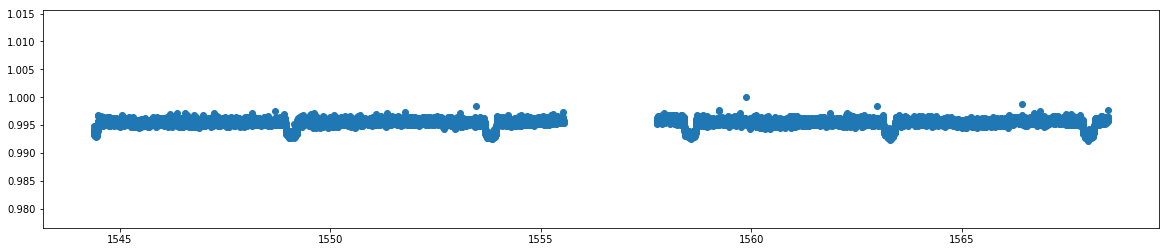

In [157]:
plt.figure(figsize=(20, 4))
plt.scatter(times, fluxes/np.nanmax(fluxes))
# plt.xlim([1413, 1413.5])

# plt.xlim([1550, 1551])

# plt.ylim([17500, 18000])

In [158]:
epoch, period, duration = toi_props["Epoch (BJD)"].values[0], toi_props["Period (days)"].values[0], toi_props["Duration (hours)"].values[0] / 24

/Users/bmmorris/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


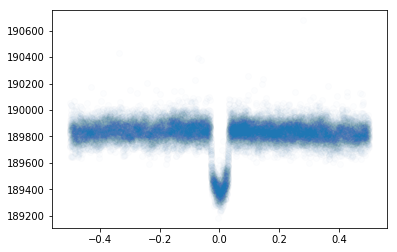

In [159]:
phase = ((times + 2457000.0 - epoch) % period) / period

phase[phase > 0.5] -= 1

plt.scatter(phase, fluxes, alpha=0.01)

In [160]:
from toolkit import LightCurve
from astropy.time import Time

In [161]:
lc = LightCurve(Time(times[not_nan] + 2457000, format='jd'), fluxes[not_nan])

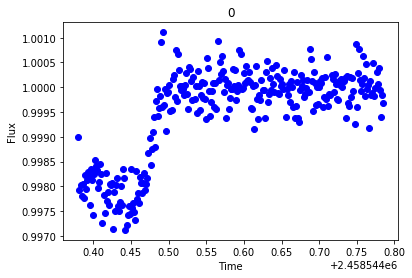

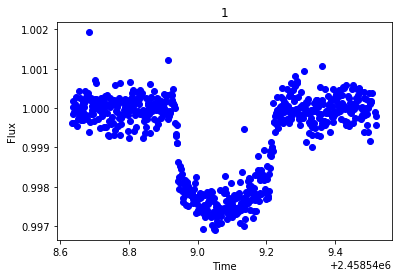

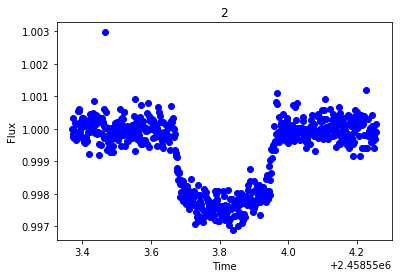

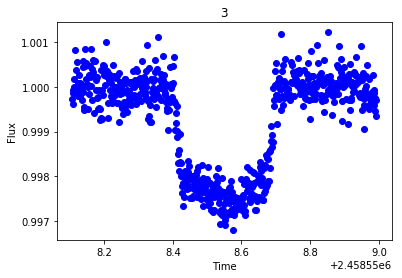

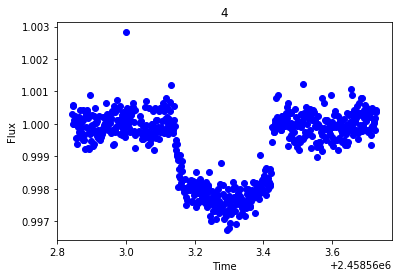

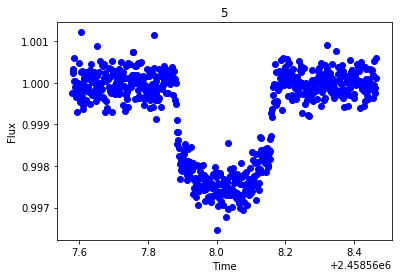

In [162]:
from batman import TransitParams

params = TransitParams()
params.t0 = epoch
params.per = period
params.duration = duration

transits = lc.mask_out_of_transit(params, oot_duration_fraction=1)
transits = LightCurve(**transits).get_transit_light_curves(params)

for transit in transits: 
    
    transit.remove_polynomial_baseline(params)

    transit.plot()
    
# lc.plot(params, phase=True)